# SOCAT data
This notebook contains plots of monthly gridded SOCAT data available [here](https://www.socat.info/index.php/data-access/)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap  # for plotting 2D data on maps
from mpl_toolkits import basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
import seaborn as sns
%matplotlib inline

/Users/gloege/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


# Load data

In [2]:
dataDir = '/Users/gloege/Documents/Projects/SOCAT-neural-network/data/data_netcdf/'
ds = xr.open_dataset(dataDir + 'SOCATv5_tracks_gridded_monthly.nc')

### Load variables, make new lon vector, put -180 ->0 at end
### Lon from -180 - 180
lon = ds['xlon'] 
### Maybe you want lon from 0 - 360
#lon = np.arange(0.5, 360.5)
lat = ds['ylat']
time = ds['tmnth']
nobs = ds['count_nobs']
fco2 = ds['FCO2_AVE_UNWTD']
std = ds['fco2_std_unwtd']
### If lon from 0 360, need to roll the data
#fco2 = ds['FCO2_AVE_WEIGHTED'].roll(xlon=-180)

### Make a meshgrid of the data
mlon, mlat = np.meshgrid(lon, lat)

In [3]:
ds

<xarray.Dataset>
Dimensions:            (bnds: 2, tmnth: 565, xlon: 360, ylat: 180)
Coordinates:
  * xlon               (xlon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 ...
  * ylat               (ylat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 ...
  * tmnth              (tmnth) datetime64[ns] 1970-01-16T12:00:00 1970-02-15 ...
Dimensions without coordinates: bnds
Data variables:
    Note               |S26 ...
    tmnth_bnds         (tmnth, bnds) float64 ...
    count_ncruise      (tmnth, ylat, xlon) float32 ...
    count_nobs         (tmnth, ylat, xlon) float32 ...
    FCO2_AVE_WEIGHTED  (tmnth, ylat, xlon) float32 ...
    FCO2_AVE_UNWTD     (tmnth, ylat, xlon) float32 ...
    fco2_min_unwtd     (tmnth, ylat, xlon) float32 ...
    fco2_max_unwtd     (tmnth, ylat, xlon) float32 ...
    fco2_std_weighted  (tmnth, ylat, xlon) float32 ...
    fco2_std_unwtd     (tmnth, ylat, xlon) float32 ...
    lat_offset_unwtd   (tmnth, ylat, xlon) float32 ...
    lon_offset_unwtd   (tmnth, ylat, x

# Shape of the data
The format for fco2 is (time, lat, lon). You can see there are 565 time points corresponding to January 1957 - January 2017

In [3]:
print('time :' + str(time.shape))
print('lat :' + str(lat.shape))
print('lon :' + str(lon.shape))
print('fco2 :' + str(fco2.shape))

time :(565,)
lat :(180,)
lon :(360,)
fco2 :(565, 180, 360)


/Users/gloege/anaconda3/lib/python3.6/site-packages/xarray/core/computation.py:565: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


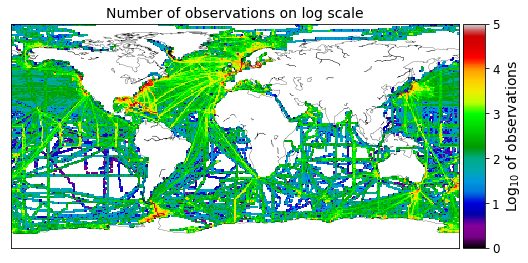

In [7]:
### Setup figure
fig = plt.figure(figsize=(8.5,11))
ax = fig.add_subplot(111)

### Take the mean across first axis (time axis)
totalobs = np.log10(np.sum(nobs, axis=0))

### Define colormap
cmap = cmocean.cm.balance
cmap = mpl.cm.spectral

### Define basemap (this just scratches the surface of what basemap can do)
map = Basemap(projection='cyl', ax=ax)

### Convert the data lon/lat meshgrid  into basemap coords
x, y = map(mlon, mlat)

### draw coastlines
map.drawcoastlines(linewidth=0.25)

### Plot some data (np.ma.masked_array will mask out points based on mask criteria)
pltdata = map.pcolor(x, y, np.ma.masked_array(totalobs, mask=(totalobs==0)), 
               cmap = cmap,
               vmin = 0, 
               vmax = 5)

### -------------------------------------------------------
### plt.colorbar() is awful.  
### cbar location : right side, 
### width : 5% of ax
### Location: fixed at 0.05 in (from the right)
### -------------------------------------------------------
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
col = fig.colorbar(pltdata, cax=cax)
col.ax.tick_params(labelsize=12)
col.set_label(r'Log$_{10}$ of observations', fontsize=14)
 
### Titles 
ax.set_title(r'Number of observations on log scale', fontsize=14)

### Show the plot
plt.show()

In [19]:
fig_dir = '/Users/gloege/Desktop/'
fig.savefig(fig_dir + 'socat_num_obs.pdf', 
            transparent=False, 
            dpi=80, 
            bbox_inches="tight")

# Temporal mean of all the data

/Users/gloege/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


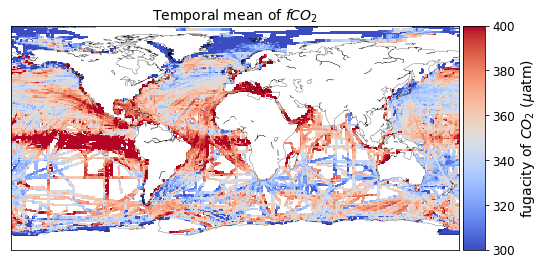

In [16]:
### Setup figure
fig = plt.figure(figsize=(8.5,11))
ax = fig.add_subplot(111)

### Take the mean across first axis (time axis)
data = np.nanmean(fco2, axis=0)

### Define colormap
cmap = cmocean.cm.balance
cmap = mpl.cm.coolwarm

### Define basemap (this just scratches the surface of what basemap can do)
map = Basemap(projection='cyl', ax=ax)

### Convert the data lon/lat meshgrid  into basemap coords
x, y = map(mlon, mlat)

### draw coastlines
map.drawcoastlines(linewidth=0.25)

### Plot some data
pltdata = map.pcolor(x, y, np.ma.masked_array(data, mask = (data==0)), 
               cmap = cmap,
               vmin = 300, 
               vmax = 400)

### -------------------------------------------------------
### plt.colorbar() is awful.  
### cbar location : right side, 
### width : 5% of ax
### Location: fixed at 0.05 in (from the right)
### -------------------------------------------------------
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
col = fig.colorbar(pltdata, cax=cax)
col.ax.tick_params(labelsize=12)
col.set_label(r'fugacity of $CO_2$ ($\mu$atm)', fontsize=14)
 
### Titles 
ax.set_title(r'Temporal mean of $fCO_2$', fontsize=14)

### Show the plot
plt.show()

# fCO2 for individual month

to do -> make it so you can define a specific month/year

as it is right now, you do not know what month/year you are choosing. 

/Users/gloege/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


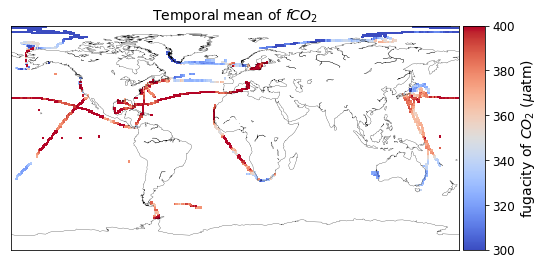

In [15]:
### Setup figure
fig = plt.figure(figsize=(8.5,11))
ax = fig.add_subplot(111)

### Take the mean across first axis (time axis)
data = np.nanmean(fco2, axis=0)
data = fco2[500, :, :]

### Define colormap
cmap = cmocean.cm.balance
cmap = mpl.cm.coolwarm

### Define basemap (this just scratches the surface of what basemap can do)
map = Basemap(projection='cyl', ax=ax)

### Convert the data lon/lat meshgrid  into basemap coords
x, y = map(mlon, mlat)

### draw coastlines
map.drawcoastlines(linewidth=0.25)

### Plot some data
pltdata = map.pcolor(x, y, np.ma.masked_array(data, mask = (data==0)), 
               cmap = cmap,
               vmin = 300, 
               vmax = 400)

### -------------------------------------------------------
### plt.colorbar() is awful.  
### cbar location : right side, 
### width : 5% of ax
### Location: fixed at 0.05 in (from the right)
### -------------------------------------------------------
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
col = fig.colorbar(pltdata, cax=cax)
col.ax.tick_params(labelsize=12)
col.set_label(r'fugacity of $CO_2$ ($\mu$atm)', fontsize=14)
 
### Titles 
ax.set_title(r'Temporal mean of $fCO_2$', fontsize=14)

### Show the plot
plt.show()

# Standard deviation 
This will plot the maximum standard deviation observed at each location (maybe not the best metric)

/Users/gloege/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: All-NaN axis encountered
  


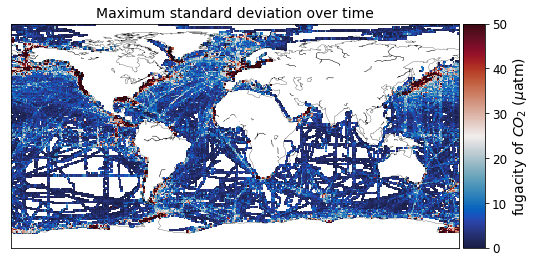

In [29]:
### Setup figure
fig = plt.figure(figsize=(8.5,11))
ax = fig.add_subplot(111)

### Take the mean across first axis (time axis)
data = np.nanmax(std, axis=0)
#data = std[200,:,:]

### Define colormap
cmap = cmocean.cm.balance

### Define basemap (this just scratches the surface of what basemap can do)
map = Basemap(projection='cyl', ax=ax)

### Convert the data lon/lat meshgrid  into basemap coords
x, y = map(mlon, mlat)

### draw coastlines
map.drawcoastlines(linewidth=0.25)

### Plot some data
pltdata = map.pcolor(x, y, np.ma.masked_array(data, mask = (data==0)), 
               cmap = cmap,
               vmin = 0, 
               vmax = 50)

### -------------------------------------------------------
### plt.colorbar() is awful.  
### cbar location : right side, 
### width : 5% of ax
### Location: fixed at 0.05 in (from the right)
### -------------------------------------------------------
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
col = fig.colorbar(pltdata, cax=cax)
col.ax.tick_params(labelsize=12)
col.set_label(r'fugacity of $CO_2$ ($\mu$atm)', fontsize=14)
 
### Titles 
ax.set_title(r'Maximum standard deviation over time', fontsize=14)

### Show the plot
plt.show()

In [30]:
fig_dir = '/Users/gloege/Desktop/'
fig.savefig(fig_dir + 'socat_maximum_std.pdf', 
            transparent=False, 
            dpi=80, 
            bbox_inches="tight")